The following is a CSV file containing a list of of 137 points along the perimeter of a circle. The (x,y) positions of the points are rounded to 2 decimal places. All points are listed in clockwise order except one. The CSV file contains 3 columns: point_id, point_x, point_y. What is the point_id of the one point that is not listed clockwise?

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
circle = pd.read_csv("MIT_DATA/circle.csv")

for i in circle.index:
    print(circle.iloc[i])
    x1 = circle.iloc[i]['point_x']
    y1 = circle.iloc[i]['point_y']

point_id    0.0
point_x     1.0
point_y     0.0
Name: 0, dtype: float64
point_id    1.00
point_x     1.00
point_y    -0.05
Name: 1, dtype: float64
point_id    2.00
point_x     1.00
point_y    -0.09
Name: 2, dtype: float64
point_id    3.00
point_x     0.99
point_y    -0.14
Name: 3, dtype: float64
point_id    4.00
point_x     0.98
point_y    -0.18
Name: 4, dtype: float64
point_id    5.00
point_x     0.97
point_y    -0.23
Name: 5, dtype: float64
point_id    6.00
point_x     0.96
point_y    -0.27
Name: 6, dtype: float64
point_id    7.00
point_x     0.95
point_y    -0.32
Name: 7, dtype: float64
point_id    8.00
point_x     0.93
point_y    -0.36
Name: 8, dtype: float64
point_id    9.00
point_x     0.92
point_y    -0.40
Name: 9, dtype: float64
point_id    10.00
point_x      0.90
point_y     -0.44
Name: 10, dtype: float64
point_id    11.00
point_x      0.88
point_y     -0.48
Name: 11, dtype: float64
point_id    12.00
point_x      0.85
point_y     -0.52
Name: 12, dtype: float64
point_id    13.0

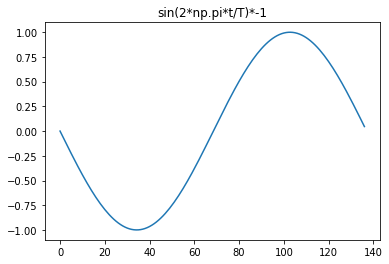

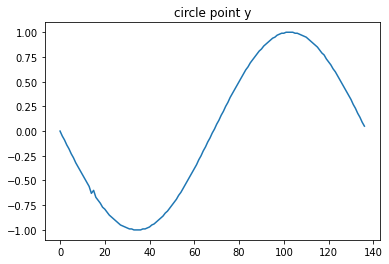

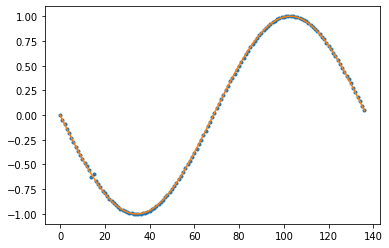

Maximum residual:  15.0

circle data points 12-17
    point_id  point_x  point_y  residual
12        12     0.85    -0.52  0.002956
13        13     0.83    -0.56  0.001481
14        14     0.77    -0.63 -0.031175
15        15     0.80    -0.60  0.034909
16        16     0.74    -0.67 -0.000342


In [13]:
len(circle)
T = len(circle)
t = np.arange(0,T)
x0 = np.sin(2*np.pi*t/T)*-1

plt.plot(t,x0)
plt.title('sin(2*np.pi*t/T)*-1')
plt.show()
x1 = np.column_stack((np.ones((T,1)),x0))
y = circle.point_y.values
plt.plot(t,y)
plt.title('circle point y')
plt.show()
A=x1.T.dot(x1) # x = intercept + predictor columns
b=x1.T.dot(y) # y = target variable
z = np.linalg.solve(A,b)
plt.plot(t,y,'.',t,x1.dot(z),'-')
plt.show()
residual = y - x1.dot(z)
circle['residual'] = residual

for i in circle.index:
    if circle.iloc[i]['residual'] == np.max(circle['residual']):
        print("Maximum residual: ",circle.iloc[i]['point_id'])
print()
print("circle data points 12-17")
print(circle[12:17])

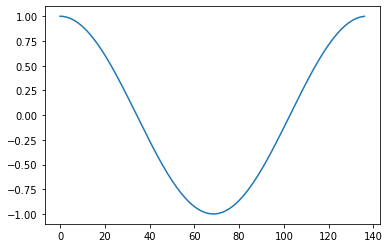

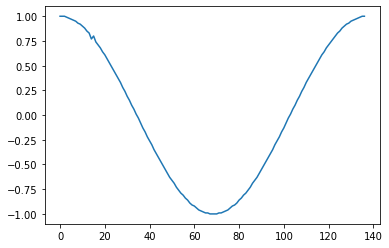

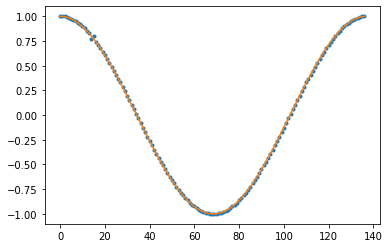

15


In [15]:
len(circle)
T = len(circle)
t = np.arange(0,T)
x0 = np.cos(2*np.pi*t/T)
plt.plot(t,x0)
plt.show()
x1 = np.column_stack((np.ones((T,1)),x0))
y = circle.point_x.values
plt.plot(t,y)
plt.show()
A=x1.T.dot(x1) # x = intercept + predictor columns
b=x1.T.dot(y) # y = target variable
z = np.linalg.solve(A,b)
plt.plot(t,y,'.',t,x1.dot(z),'-')
plt.show()
residual = y - x1.dot(z)
circle['residual'] = residual

for i in circle.index:
    if circle.loc[i]['residual'] == np.max(circle['residual']):
        print(i)

The following link has a scrambled image Y of a grayscale image X. Image X has a number. Here are some facts:

1. Image X was scrambled in Python 2.7 using the Mersenne Twister random number generator seeded with the number 2.

2. We used the numpy flatten() function to flatten the 2D image into a 1D array.

3. We used the random.shuffle(...) function (not the numpy one) to shuffle a list of numbers [0, 1, 2, …, n-1] where n is the number of pixels in image X.

4. The shuffled list was used to assign the pixels in the scrambled image like Y[i] = X[shuffled[i]] for all i in [0, 1, 2, …, n-1].

5. Tell us, what's the number in image X? If the unscrambled image is noisy, don't worry about it, as long as you can see the number.

In [1]:
# %matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from os import walk
import os

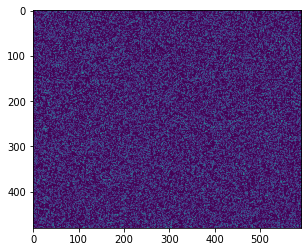

480 592


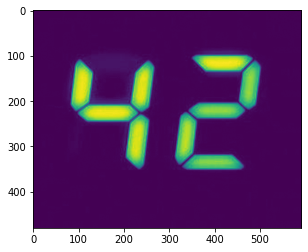

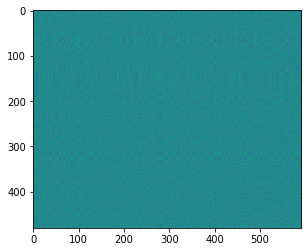

In [3]:
import random

def im_get(imp1):
    image1 = cv2.imread(imp1,0)
    return image1

image1 = im_get("MIT_DATA/mystery_number_scrambled.jpg")
plt.imshow(image1)
plt.show()

scrambled = im_get("MIT_DATA/mystery_number_scrambled.jpg")

m,n = scrambled.shape[:]
print(m,n)
s = scrambled.flatten().copy()
random.seed(2)

saved=[]
for i in reversed(range(1, len(s))):
    # pick an element in x[:i+1] with which to exchange x[i]
    j = int(random.random() * (i+1))
    saved.append(j)
    
for j,i in zip(reversed(saved),range(1,len(s))):
    y = s[j]
    z = s[i]
    s[i]=y
    s[j]=z
    
img = s.reshape((m,n))
plt.imshow(img)
plt.show()

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_train = sklearn_pca.fit_transform(image1.T)
X_train = sklearn_pca.fit_transform(image1)

plt.imshow(X_train[:,0:4].dot(Y_train[:,0:4].T))
plt.show()